In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("C:/Users/LENOVO/OneDrive/Desktop/PRODIGY/Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.tail()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
data=data.drop(columns=['CustomerID','Age','Gender'],axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [7]:
from sklearn.cluster  import KMeans

In [12]:
model=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=10)
    kmeans.fit(data)
    model.append(kmeans.inertia_)


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

In [13]:
model

[184609.98434090626,
 106348.37306211122,
 73880.64496247195,
 44448.4554479337,
 37265.86520484346,
 31632.259809473475,
 25038.836208685156,
 23337.407053782084,
 20137.434537925845]

Text(0.5, 0, 'ELBOW GRAPH')

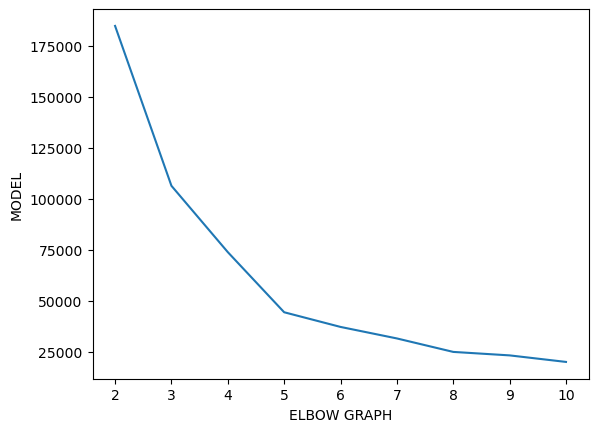

In [15]:
plt.plot(range(2,11),model)
plt.xlabel("NO:OF CLUSTER CENTROIDS")
plt.ylabel("MODEL")
plt.xlabel("ELBOW GRAPH")

In [16]:
kmeans=KMeans(n_clusters=5)
y=kmeans.fit_predict(data)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
y

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 2, 4, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [19]:
data[y==3]

,Annual Income (k$),Spending Score (1-100)
0,15,39
2,16,6
4,17,40
6,18,6
8,19,3
10,19,14
12,20,15
14,20,13
16,21,35
18,23,29


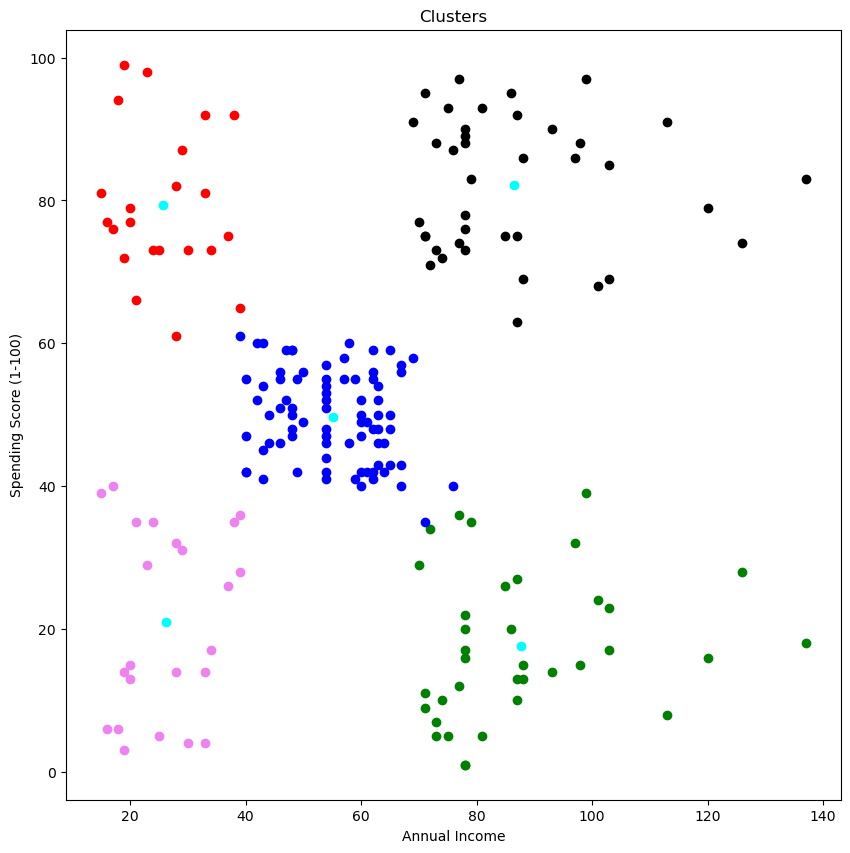

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(data[y==0]['Annual Income (k$)'],data[y==0]['Spending Score (1-100)'],c='red',label='cluster-1')
plt.scatter(data[y==1]['Annual Income (k$)'],data[y==1]['Spending Score (1-100)'],c='green',label='cluster-2')
plt.scatter(data[y==2]['Annual Income (k$)'],data[y==2]['Spending Score (1-100)'],c='black',label='cluster-3')
plt.scatter(data[y==3]['Annual Income (k$)'],data[y==3]['Spending Score (1-100)'],c='violet',label='cluster-4')
plt.scatter(data[y==4]['Annual Income (k$)'],data[y==4]['Spending Score (1-100)'],c='blue',label='cluster-5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='cyan',label='centroids')
plt.title("Clusters")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score (1-100)")
plt.show()